Creating an Artificial Neural Network for Customer Churn

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
from tensorflow import keras
import os

In [2]:
os.chdir(r"E:\Pyhton for Data Science and Machine Learning")

In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
pd.set_option('display.max_columns', None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Removing irrelevant variables

dataset=dataset.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [7]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
# Creating dummy variables

dataset=pd.get_dummies(data=dataset,columns=['Geography', 'Gender'],drop_first=True)

In [11]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
# Missing value checking

dataset.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [13]:
# Segregating dependent & independent variables

X = dataset.drop("Exited",axis=1)
y = dataset.loc[:, "Exited"]

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
# Splitting the dataset into Training set and Testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now Building the ANN

In [19]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import backend

In [20]:
classifier = Sequential()

In [21]:
# Adding the input layer and the first hidden layer 

classifier.add(Dense(units=6,kernel_initializer='uniform', activation='relu',input_dim=11))

In [22]:
# Adding the second hidden layer

classifier.add(Dense(units=6,kernel_initializer='uniform', activation='relu'))

In [23]:
# Adding the output layer

classifier.add(Dense(units=1,kernel_initializer='uniform', activation='sigmoid'))

In [24]:
# Compiling the ANN

classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Fitting the ANN to the Training set

classifier.fit(X_train, y_train, batch_size=10,epochs=100, validation_split=0.1)

Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4913 - accuracy: 0.7953 - val_loss: 0.4196 - val_accuracy: 0.7950
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4291 - accuracy: 0.7961 - val_loss: 0.4110 - val_accuracy: 0.7950
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4240 - accuracy: 0.7961 - val_loss: 0.4040 - val_accuracy: 0.7950
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8169 - val_loss: 0.4003 - val_accuracy: 0.8275
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.8264 - val_loss: 0.3982 - val_accuracy: 0.8338
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8274 - val_loss: 0.3946 - val_accuracy: 0.8363
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4152 - accuracy: 0.8301 - val_loss: 0.3931 - val_accuracy: 0.8400

Making Predictions and Evaluating the Model

In [27]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [28]:
y_pred

array([[0.20359792],
       [0.3446929 ],
       [0.16927631],
       ...,
       [0.19803262],
       [0.16846734],
       [0.12690541]], dtype=float32)

In [29]:
y_pred = np.where(y_pred > 0.5,1,0)

In [30]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [31]:
# Making the Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[1543   52]
 [ 270  135]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.72      0.33      0.46       405

    accuracy                           0.84      2000
   macro avg       0.79      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



In [33]:
print(accuracy_score(y_test, y_pred))

0.839


In [34]:
# Computing false and true positive rates

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(y_pred,y_test,drop_intermediate=False)

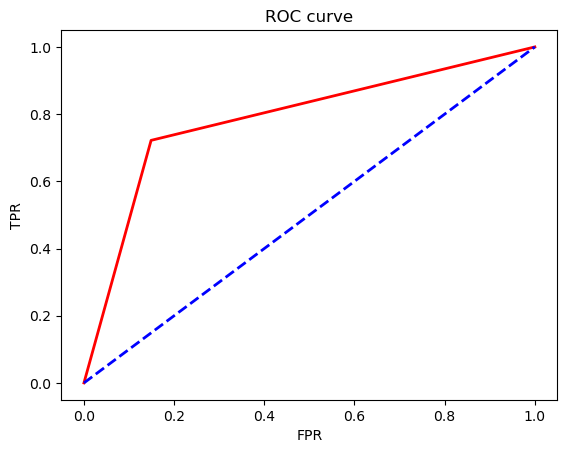

0.7865003495255596

In [35]:
import matplotlib.pyplot as plt
plt.figure()

# Adding the ROC

plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
roc_auc_score(y_pred,y_test) # AUC Value

In [37]:
# KS calculation

a=pd.DataFrame(y_test)
b = pd.DataFrame(classifier.predict(X_test))
a = a.reset_index()
b = b.reset_index()
rock = pd.concat([a,b], axis=1)
rock = rock.iloc[:,[1,3] ]
rock.head()
df = rock.copy()
df.columns = ["y","p"]
df.head()

63/63 [==============================] - 0s 1ms/step


,y,p
0,0,0.203598
1,1,0.344693
2,0,0.169276
3,0,0.064842
4,0,0.195319


In [38]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    # Formating
    
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    # Display KS
    
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)


mydf = ks(data=df,target="y", prob="p")


        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.485989  0.862357     142         58     35.06%         3.64%   
2       0.334275  0.485524      76        124     18.77%         7.77%   
3       0.243090  0.334132      55        145     13.58%         9.09%   
4       0.189308  0.242667      35        165      8.64%        10.34%   
5       0.144908  0.188856      25        175      6.17%        10.97%   
6       0.112190  0.144787      20        180      4.94%        11.29%   
7       0.083572  0.111988      17        183      4.20%        11.47%   
8       0.060323  0.083482      13        187      3.21%        11.72%   
9       0.039691  0.060228      12        188      2.96%        11.79%   
10      0.006495  0.039589      10        190      2.47%        11.91%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             35.06